# Table of Contents

This notebook covers time-based analysis portion of the project, focusing on the evolution of the number of vehicle offers and their average prices over the dataset's timeframe. By leveraging autocorrelation analysis, the analysis uncovers potential valuable insights into temporal patterns and trends. The cleaned dataset from the segmentation notebook was directly utilized for this analysis.


1. [Exploring the Preprocessed Dataset](##1.-exploring-the-preprocessed-dataset)

2. [Exploring General Patterns in Daily Offers and Average Price](##2.-exploring-general-patterns-in-daily-offers-and-average-price)
    - 2.1. [Sudden Spike in Offers](###2.1.-sudden-spike-in-offers)
        - 2.1.1. [Comparing Offer Trends for New and Used Vehicles](####2.1.1.-comparing-offer-trends-for-new-and-used-vehicles)

    - 2.2. [Distribution of Offers by Day of the Week](###2.2.-distribution-of-offers-by-day-of-the-week)
    - 2.3. [Weekly Distribution of Offers](###2.3.-weekly-distribution-of-offers)
    - 2.4. [Evolution of Average Price in Ads Over Time](###2.4.-evolution-of-average-price-in-ads-over-time)




3. [Autocorrelation Analysis](##3.-autocorrelation-analysis)
4. [Recommendations](##4.-recommendations)
5. [Threats to Validity](##5.-threats-to-validity)
6. [Next Steps](##6.-next-steps)

# Objective
To leverage car advertisement data to identify temporal patterns that can assist in optimizing and timing marketing efforts, reducing costs, and improving ROI.

# Hypothesis
Understanding the temporal patterns in car ads, such as the timing and volume of vehicle offers on car sales platforms, can help insurers optimize marketing efforts and reduce marketing costs.

In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot



## 1. Exploring the Preprocessed Dataset

In [21]:
# Import data
df=pd.read_csv('preprocessed_data.csv', parse_dates=['Offer_publication_date'])

In [22]:
# Get overview of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203936 entries, 0 to 203935
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Condition                       203936 non-null  object        
 1   Vehicle_brand                   203936 non-null  object        
 2   Vehicle_model                   203936 non-null  object        
 3   Production_year                 203936 non-null  int64         
 4   Mileage_km                      203936 non-null  float64       
 5   Power_HP                        203936 non-null  float64       
 6   Displacement_cm3                203936 non-null  float64       
 7   Fuel_type                       203936 non-null  object        
 8   Drive                           203936 non-null  object        
 9   Transmission                    203936 non-null  object        
 10  Type                            203936 non-null  object 

In [23]:
df.head()

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,First_owner,Offer_publication_date,Offer_location,Features,Price_CAD,Years_From_Production_To_Offer
0,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,No,2021-05-04,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],28006,0
1,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,No,2021-05-03,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],14133,47
2,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Front wheels,Automatic,small_cars,3.0,silver,No,2021-05-03,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",14588,3
3,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,No,2021-04-30,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",12964,9
4,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,blue,No,2021-04-30,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",31808,0


In [24]:
df.columns

Index(['Condition', 'Vehicle_brand', 'Vehicle_model', 'Production_year',
       'Mileage_km', 'Power_HP', 'Displacement_cm3', 'Fuel_type', 'Drive',
       'Transmission', 'Type', 'Doors_number', 'Colour', 'First_owner',
       'Offer_publication_date', 'Offer_location', 'Features', 'Price_CAD',
       'Years_From_Production_To_Offer'],
      dtype='object')

## 2. Exploring General Patterns in Daily Offers and Average Price

In [25]:
# print date range
print(f"Date Range: {df['Offer_publication_date'].min()} to {df['Offer_publication_date'].max()}")

Date Range: 2021-03-26 00:00:00 to 2021-05-05 00:00:00


### 2.1. Sudden Spike in Offers
A notable observation is the abrupt surge in the number of offers around April 25. This spike could potentially be attributed to annual seasonality or external factors, such as the platform gaining sudden popularity. Regardless of the cause, obtaining additional data spanning multiple years would be valuable to determine whether this is a recurring trend or a one-time anomaly.


In [26]:
# Aggregate daily trends
daily_volume = df.groupby('Offer_publication_date').size()


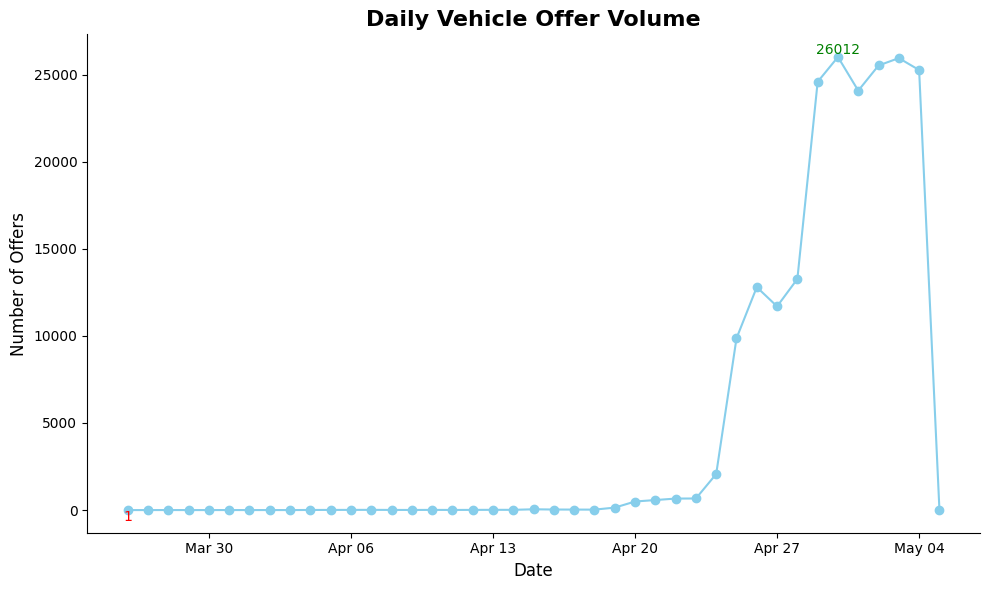

In [27]:
# Find the maximum and minimum points
max_date = daily_volume.idxmax()
max_value = daily_volume.max()
min_date = daily_volume.idxmin()
min_value = daily_volume.min()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_volume.index, daily_volume.values, marker='o', color='skyblue', label="Daily Volume")

# Annotate max and min points
plt.text(max_date, max_value + 5, f'{max_value}', ha='center', va='bottom', fontsize=10, color='green')
plt.text(min_date, min_value - 5, f'{min_value}', ha='center', va='top', fontsize=10, color='red')

# Format the plot
plt.title("Daily Vehicle Offer Volume", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Offers", fontsize=12)

# Remove gridlines and borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Month Day'
plt.xticks(rotation=360, fontsize=10)

# Adjust y-axis tick labels
plt.yticks(fontsize=10)

# Add some padding for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# The number of daily offers
df.Offer_publication_date.value_counts()

,count
Offer_publication_date,
2021-04-30,26012
2021-05-03,25947
2021-05-02,25524
2021-05-04,25264
2021-04-29,24588
2021-05-01,24079
2021-04-28,13270
2021-04-26,12799
2021-04-27,11694


In [29]:
# percentage of total offers account for by each day
round(df.Offer_publication_date.value_counts(normalize=True)*100,4)

,proportion
Offer_publication_date,
2021-04-30,12.7550
2021-05-03,12.7231
2021-05-02,12.5157
2021-05-04,12.3882
2021-04-29,12.0567
2021-05-01,11.8071
2021-04-28,6.5069
2021-04-26,6.2760
2021-04-27,5.7342


#### 2.1.1. Comparing Offer Trends for New and Used Vehicles

The evolution of offers for both new and used vehicles reveals similar patterns over time. While used vehicles are more prevalent in the dataset, resulting in a higher number of offers, the overall temporal trends are consistent between the two categories.


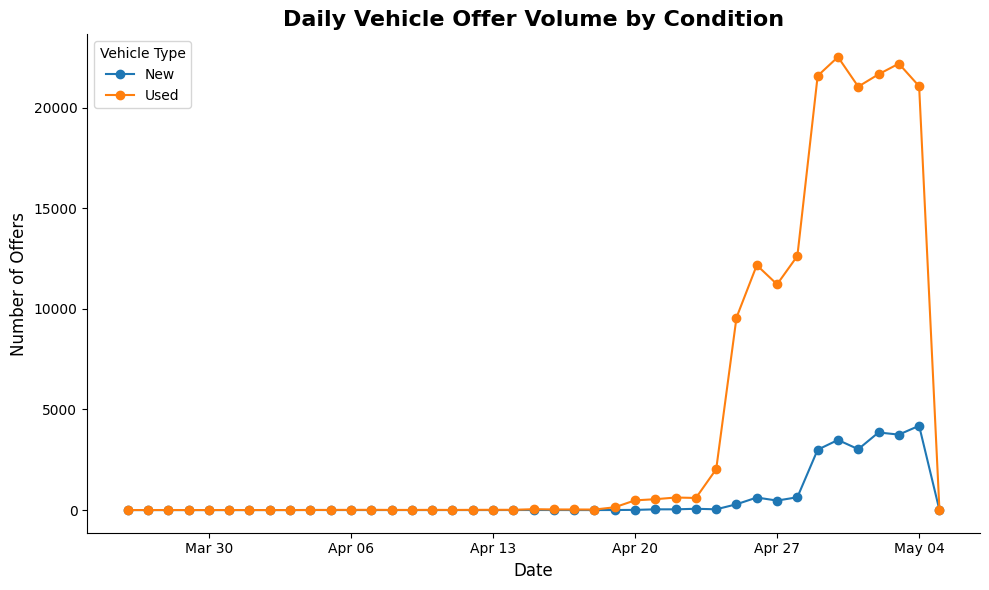

In [30]:
# Group by  Condition and aggregate daily volume for each type
daily_volume_by_type = df.groupby(['Offer_publication_date', 'Condition']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each vehicle condition's volume over time
for vehicle_type in daily_volume_by_type.columns:
    plt.plot(daily_volume_by_type.index, daily_volume_by_type[vehicle_type], marker='o', label=vehicle_type)

# Format the plot
plt.title("Daily Vehicle Offer Volume by Condition", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Offers", fontsize=12)

# Remove gridlines and borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Month Day'
plt.xticks(rotation=360, fontsize=10)

# Adjust y-axis tick labels
plt.yticks(fontsize=10)

# Add legend
plt.legend(title='Vehicle Type', fontsize=10)

# Add some padding for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### 2.2. Distribution of Offers by Day of the Week

Monday stands out as the busiest day for vehicle advertisements, closely followed by Sunday. Conversely, Wednesday experiences the lowest number of ads.

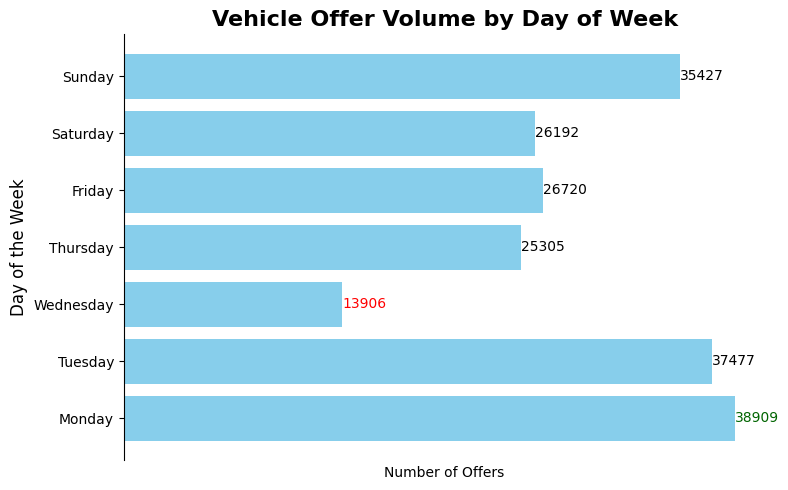

In [31]:
# Creating a column for day of the week
df['Day_of_Week'] = df['Offer_publication_date'].dt.day_name()

# Aggregate by weekday and ensure the order starts from Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_volume = df['Day_of_Week'].value_counts().reindex(weekday_order)

# Identify max and min days
max_day = weekday_volume.idxmax()
min_day = weekday_volume.idxmin()

# Colors for bars
bar_colors = ['skyblue' for _ in weekday_volume.index]

# Plot weekday trends
plt.figure(figsize=(8, 5))  # Adjust figsize if needed
bars = plt.barh(weekday_volume.index, weekday_volume.values, color=bar_colors)  # Use barh for horizontal bars

# Add data labels
for bar in bars:
    label_color = 'darkgreen' if bar.get_y() == bars[weekday_volume.index.get_loc(max_day)].get_y() else \
                  'red' if bar.get_y() == bars[weekday_volume.index.get_loc(min_day)].get_y() else 'black'
    plt.text(
        bar.get_width() + 1,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center of the bar vertically
        f'{int(bar.get_width())}',  # Label value (width now)
        va='center', fontsize=10, color=label_color  # Vertical alignment
    )

# Format the plot
plt.title("Vehicle Offer Volume by Day of Week", fontsize=16, fontweight='bold')
plt.ylabel("Day of the Week", fontsize=12)
plt.xlabel("Number of Offers")  # Remove x-axis label
plt.yticks(fontsize=10)  # Adjust y-axis tick labels
plt.xticks([])  # Remove x-axis ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom spine

# Add padding for better layout
plt.tight_layout()

# Show the plot
plt.show()

### 2.3. Weekly Distribution of Offers

The vast majority of vehicle ads in the dataset were posted during the final three weeks. This reinforses the need to question whether this surge represents an annual trend or is simply noise.


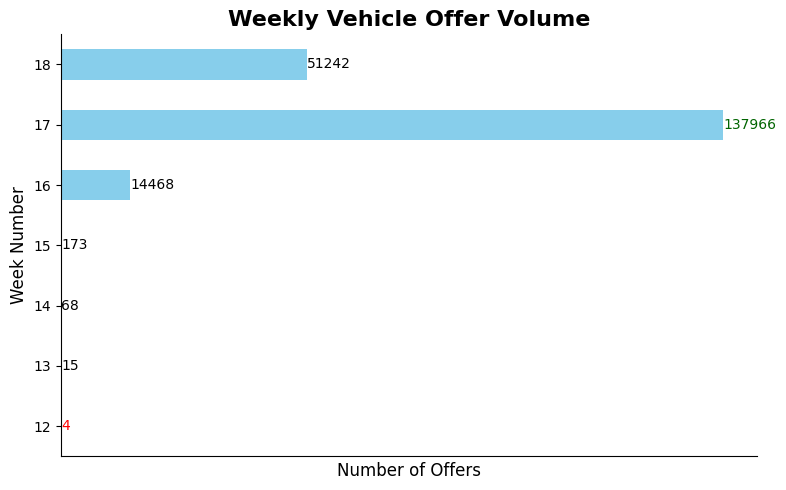

In [32]:
# Calculate week number
df['Week_Number'] = df['Offer_publication_date'].dt.isocalendar().week  # Week number in the calendar year

# Aggregate weekly trends
weekly_volume = df.groupby('Week_Number').size()

# Plot weekly trends (horizontal orientation)
plt.figure(figsize=(8, 5))
bars = weekly_volume.plot(kind='barh', color='skyblue', title="Weekly Vehicle Offer Volume")

# Format the plot
plt.title("Weekly Vehicle Offer Volume", fontsize=16, fontweight='bold')
plt.xlabel("Number of Offers", fontsize=12)
plt.ylabel("Week Number", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add data labels on bars
for bar in bars.patches:
    value = int(bar.get_width())
    x_pos = bar.get_width() + 1
    y_pos = bar.get_y() + bar.get_height() / 2

    # Highlight the min and max values
    if value == weekly_volume.min():
        plt.text(x_pos, y_pos, f'{value}', va='center', fontsize=10, color='red')  # Min value in red
    elif value == weekly_volume.max():
        plt.text(x_pos, y_pos, f'{value}', va='center', fontsize=10, color='darkgreen')  # Max value in dark green
    else:
        plt.text(x_pos, y_pos, f'{value}', va='center', fontsize=10, color='black')  # Other values in black

plt.xticks([])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### 2.4. Evolution of Average Price in Ads Over Time  

The average price of vehicles is mostly clustered around 20,000 CAD throughout the dataset's time period. However, there are a few outliers that  impact the daily averages. For example, on 2021-03-29, a single listing, which was the only one for that day, was priced at over 100,000 CAD and led to a high average for the day. Similarly, on 2021-03-30, only one car was listed, priced at 2,500 CAD, resulting in the lowest daily average recorded.


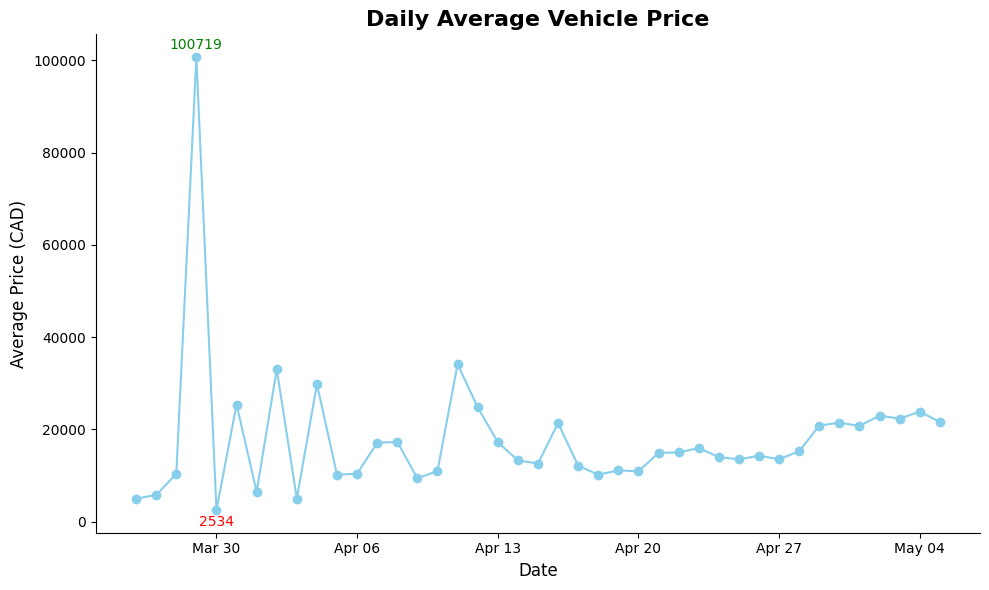

In [33]:
# Calculate daily average price
daily_avg_price = df.groupby('Offer_publication_date')['Price_CAD'].mean()

# Find the maximum and minimum points
max_date = daily_avg_price.idxmax()
max_value = daily_avg_price.max()
min_date = daily_avg_price.idxmin()
min_value = daily_avg_price.min()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', color='skyblue', label="Daily Avg Price")

# Annotate max and min points (value only, no "Max" or "Min" text)
plt.text(max_date, max_value + 1000, f'{max_value:.0f}', ha='center', va='bottom', fontsize=10, color='green')
plt.text(min_date, min_value - 1000, f'{min_value:.0f}', ha='center', va='top', fontsize=10, color='red')

# Format the plot
plt.title("Daily Average Vehicle Price", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price (CAD)", fontsize=12)

# Remove gridlines and borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Month Day'
plt.xticks(rotation=360, fontsize=10)

# Adjust y-axis tick labels
plt.yticks(fontsize=10)

# Add some padding for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# checking the maximum point in the above plot
df[df['Offer_publication_date'] == '2021-03-29']

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,...,Doors_number,Colour,First_owner,Offer_publication_date,Offer_location,Features,Price_CAD,Years_From_Production_To_Offer,Day_of_Week,Week_Number
17859,Used,Bentley,Continental GT,2007,91610.0,560.0,5998.0,Gasoline,4x4 (permanent),Automatic,...,2.0,black,No,2021-03-29,"ul. Krzemienna 1 - 43-300 Bielsko-Biała, Śląsk...","['ABS', 'Electric front windows', 'Passengers ...",100719,14,Monday,13


In [35]:
df[df['Offer_publication_date'] == '2021-03-30']

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,...,Doors_number,Colour,First_owner,Offer_publication_date,Offer_location,Features,Price_CAD,Years_From_Production_To_Offer,Day_of_Week,Week_Number
193834,Used,Volkswagen,Sharan,2002,270000.0,115.0,1984.0,Gasoline,Front wheels,Manual,...,5.0,silver,No,2021-03-30,"Ul. C.K. Norwida 12 - 99-210 Uniejów, poddębic...","['ABS', 'Electrically adjustable mirrors', 'Pa...",2534,19,Tuesday,13


## 3. Autocorrelation Analysis

### 3.1. Daily Offers  
- There is significant positive autocorrelation at lower lags for up to 5 days, indicating short-term dependency in listing patterns. This means that the number of offers on a given day is strongly correlated with the volume of offers from the previous 5 days.  
- Beyond 5 days, the autocorrelation gradually diminishes and becomes slightly negative at around 9 days, indicating an inverse relationship at that lag. This negative autocorrelation, although not statistically significant, persists up to approximately 40 days.

### 3.2. Average Prices  
- For average prices, there is minimal to no significant autocorrelation across all lags. This indicates no consistent relationship between the average price of vehicles listed on any given day and the prices from previous days.  
- The lack of statistically significant values suggests that daily price fluctuations are more random and likely influenced by external factors or individual seller behavior.


In [36]:
# Compute daily counts and average prices directly from df
daily_counts = df['Offer_publication_date'].value_counts().sort_index() # ensures it is ordered by date
daily_avg_prices = df.groupby('Offer_publication_date')['Price_CAD'].mean()

# Combine into a single DataFrame for analysis
time_series_data = pd.DataFrame({
    'Daily_Counts': daily_counts,
    'Average_Price': daily_avg_prices
})

In [37]:
# Ensure continuity in the time series by filling missing dates
time_series_data = time_series_data.asfreq('D')

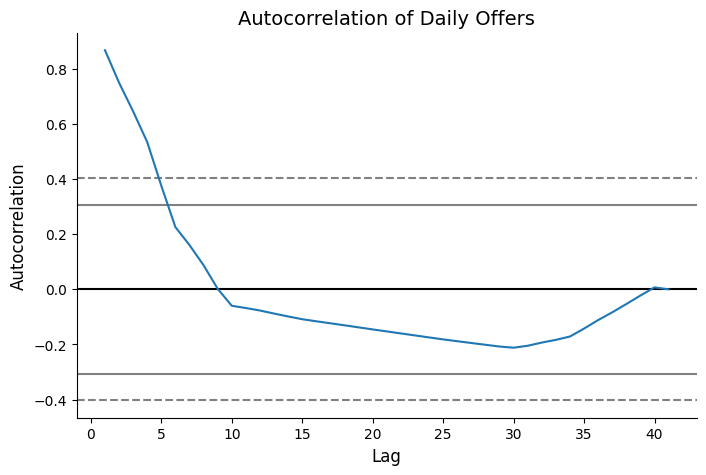

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

# Create the autocorrelation plot
autocorrelation_plot(time_series_data['Daily_Counts'].dropna(), ax=ax)

# Customize the plot
ax.grid(False)  # Remove grid lines
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine

# Set title and labels for clarity
ax.set_title("Autocorrelation of Daily Offers", fontsize=14)
ax.set_xlabel("Lag", fontsize=12)
ax.set_ylabel("Autocorrelation", fontsize=12)

plt.show()


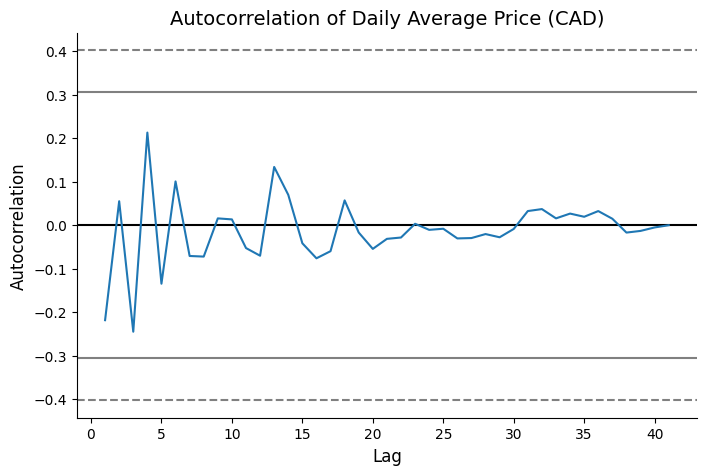

In [39]:
# Assuming `time_series_data['Daily_Counts']` is the data we are analyzing
fig, ax = plt.subplots(figsize=(8, 5))

# Create the autocorrelation plot
autocorrelation_plot(time_series_data['Average_Price'].dropna(), ax=ax)

# Customize the plot
ax.grid(False)  # Remove grid lines
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine

# Set title and labels for clarity
ax.set_title("Autocorrelation of Daily Average Price (CAD)", fontsize=14)
ax.set_xlabel("Lag", fontsize=12)
ax.set_ylabel("Autocorrelation", fontsize=12)

plt.show()


## 4. Recommendations  
- The observed short-term dependency in the number of vehicle offers over the preceding 5 days provides an opportunity for Definity to monitor ad data and optimize its marketing efforts accordingly.  
- Partnering with ad platforms to align marketing campaigns with periods of high listing activity could improve ROI. Timing campaigns based on the trend of the last 5 days ensures more targeted and effective ad spend.




## 5. Threats to Validity  
- The irregularities in the data and the limited date range reduce the reliability of insights.
- Outliers and potential data anomalies further challenge the robustness of the insights. Therefore, the recommendations are cautiously based on the identified short-term autocorrelation.



## 6. Next Steps  
- Collect data spanning multiple years to better understand annual seasonal trends.
- With a larger dataset, forecasting models can be built to anticipate listing volumes and pricing patterns. These models can help Definity streamline marketing efforts and optimize ad spend.